In [221]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules_v2 import euler as euler
from modules_v2 import rs_rad_ker as rk
from scipy.interpolate import interp1d
import scipy.integrate as intg

%pylab notebook

figpath="../../articles/formalism/figures/"
!mkdir $figpath

Populating the interactive namespace from numpy and matplotlib
mkdir: ../../articles/formalism/figures/: File exists


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
from matplotlib import rcParams,rc
params = {'backend': 'pdf',
          'savefig.dpi': 200,
          'axes.labelsize': 15,
          'text.fontsize': 15,
          'axes.linewidth' : 2,
          'lines.linewidth' : 2,
          'font.size': 15,
          'xtick.labelsize': 15,
          'ytick.major.pad': 6,
          'xtick.major.pad': 6,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family':'sans-serif',
          'font.sans-serif':'FreeSans'}
rc('text.latex', preamble='\usepackage{sfmath}')
rcParams.update(params)

b="#1f77b4"
o="#ff7f0e"
g="#2ca02c"
r="#d62728"
pr="#9467bd"
br="#8c564b"
p="#e377c2"
gr="#7f7f7f"
y="#bcbd22"
c="#17becf"

In [62]:
sampling=6000 ; nside=512 ;  lmaxh=3*nside ; domega=4.*pi/h.nside2npix(nside) ; pixsize=sqrt(domega)
beta0=min(180.,180.*22/lmaxh)*pi/180. ; print beta0*180./pi
theta,pl2=rk.get_plm0(lmaxh,sampling,theta_max=4.*beta0)

rad_ker=rk.calc_qu2eb_rad_ker(lmaxh,theta,pl2)

2.578125


# Get $g_{\ell}$ from $G(\beta)$

In [226]:
pixsize

0.0019986849764579854

In [199]:
apow=rk.fn_apodization(theta,3.*beta0)
gbeta=rad_ker*apow

gbetap=rk.mod_rad_ker(theta,0.,2.*pixsize,amp=1.,slope=1,expslope=1.5)
fn=interp1d(theta,gbetap*gbetap,kind="cubic") ; norm=intg.quad(fn,0.,3.*beta0)[0] ; print norm
gbetap=gbetap/norm

gaussblw=h.gauss_beam(fwhm=(15./60.)*np.pi/180.,lmax=lmaxh)
gaussbln=h.gauss_beam(fwhm=(12./60.)*np.pi/180.,lmax=lmaxh)
glp=rk.get_gl_from_gbeta(theta,gbetap,pl2,35*pixsize,lmaxh,rtol=1e-8,atol=1e-8)
gl3=rk.get_gl_from_gbeta(theta,gbeta,pl2,3.*beta0,lmaxh,rtol=1e-8,atol=1e-8)

3.01104169486e-08


<IPython.core.display.Javascript object>


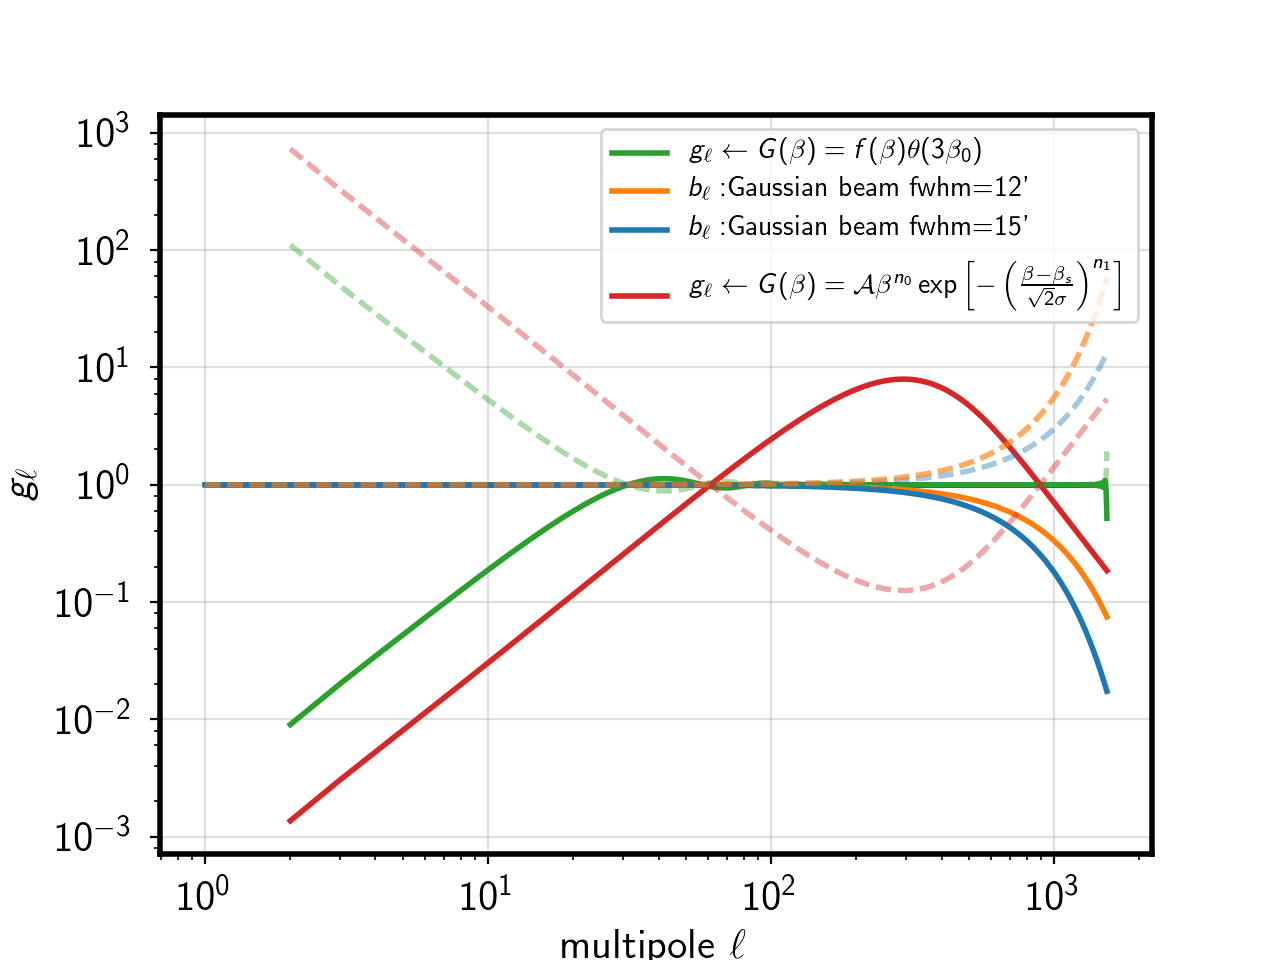

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in divide


In [234]:
figure()
ell=arange(3*nside+1)
prefactor=1.
plot(ell,prefactor*gl3,"-",c=g,lw=2,label=r"$g_{\ell} \leftarrow G(\beta) = f(\beta)\theta(3\beta_0)$")
plot(ell,prefactor*gaussbln,"-",c=o,lw=2,label=r"$b_{\ell}:$" + "Gaussian beam fwhm=12' ")
plot(ell,prefactor*gaussblw,"-",c=b,lw=2,label=r"$b_{\ell}:$" + "Gaussian beam fwhm=15' ")
plot(ell,prefactor*glp,"-",c=r,lw=2,label=r"$g_{\ell} \leftarrow G(\beta)= \mathcal{A} \beta^{n_0} \exp{\left[ -\left({\frac{\beta-\beta_s}{\sqrt{2} \sigma}}\right)^{n_1}\right] }$")
#plot(ell,prefactor*gaussblww,"-",c=o,lw=2,label=r"$b_{\ell}:$" + "Gaussian beam fwhm=12' ")
plot(ell,prefactor*(1./gl3**1.),"--",c=g,lw=2,alpha=0.4)
plot(ell,prefactor*(1./gaussbln**1.),"--",c=b,lw=2,alpha=0.4)
plot(ell,prefactor*(1./gaussblw**1.),"--",c=o,lw=2,alpha=0.4)
plot(ell,prefactor*(1./gaussblww**1.),"--",c=o,lw=2,alpha=0.4)
plot(ell,prefactor*(1./glp**1.),"--",c=r,lw=2,alpha=0.4)
hlines(1,1,lmaxh)
grid(alpha=0.4)
loglog()
xlabel("multipole $\ell$")
ylabel(r"$g_\ell$")
legend(loc="upper right",fontsize=10)

figname=figpath + "gl_for_different_gbeta_lmax" + str(3*nside) + ".pdf"
savefig(figname,dpi=300,bbox_inches="tight")

# Get $G(\beta)$ from $g_{\ell}$ 

In [201]:
recgbetap=rk.get_gbeta_from_gl(theta,glp,pl2)
recgbeta=rk.get_gbeta_from_gl(theta,gl3,pl2)
gbetabln=rk.get_gbeta_from_gl(theta,gaussbln,pl2)
gbetablw=rk.get_gbeta_from_gl(theta,gaussblw,pl2)
#gbetablww=rk.get_gbeta_from_gl(theta,gaussblww,pl2)

<IPython.core.display.Javascript object>


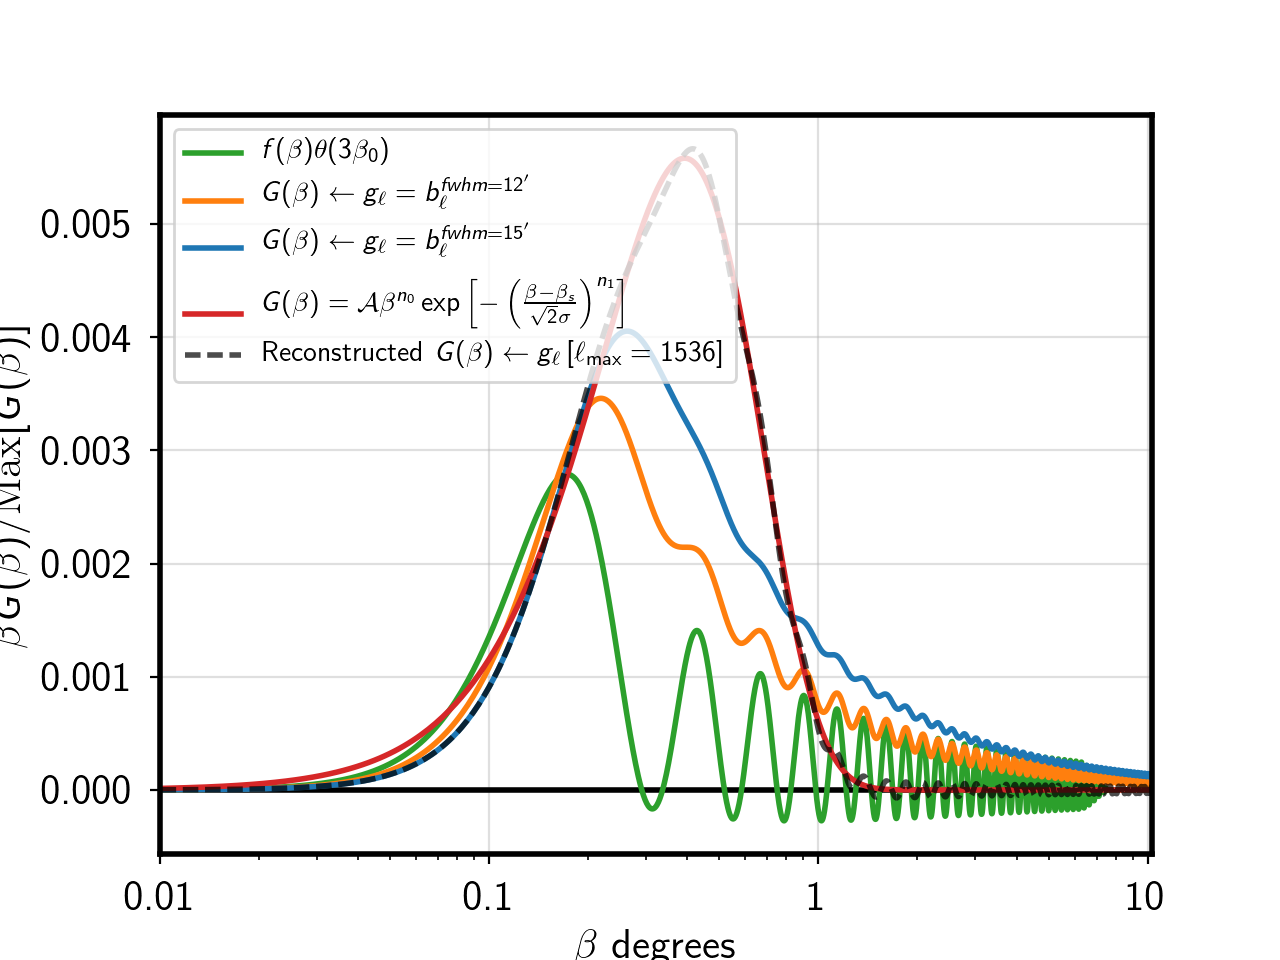

In [233]:
figure()
pow=1.
plot(theta*180./pi,(theta**pow)*gbeta/max(gbeta),"-",c=g,lw=2,label=r"$f(\beta)\theta(3\beta_0)$")
#plot(theta*180./pi,(theta**pow)*recgbeta/max(gbeta),"m--",lw=2,label=r"$f(\beta)$")
plot(theta*180./pi,(theta**pow)*gbetabln/max(gbetabln),"-",c=o,lw=2,label=r"$G(\beta) \leftarrow g_{\ell}=b^{fwhm=12'}_{\ell}$")
plot(theta*180./pi,(theta**pow)*gbetablw/max(gbetablw),"-",c=b,lw=2,label=r"$G(\beta) \leftarrow g_{\ell}=b^{fwhm=15'}_{\ell}$")
plot(theta*180./pi,(theta**pow)*gbetap/max(gbetap),"-",c=r,lw=2,label=r"$G(\beta)= \mathcal{A} \beta^{n_0} \exp{\left[ -\left({\frac{\beta-\beta_s}{\sqrt{2} \sigma}}\right)^{n_1} \right] }$")
plot(theta*180./pi,(theta**pow)*recgbetap/max(gbetap),"--",c="k",alpha=0.7,lw=2,label=r"Reconstructed $G(\beta) \leftarrow g_{\ell} \,[\ell_{\rm max} =" + str(3*nside) + "]$")

#plot(theta*180./pi,(theta**pow)*gbeta,"-",c=g,lw=2,alpha=1.,label=r"$f(\beta)\theta(3\beta_0)$")
##plot(theta*180./pi,(theta**pow)*recgbeta,"m--",lw=2,label=r"$f(\beta)$")
#plot(theta*180./pi,(theta**pow)*gbetap,"-",c=r,lw=2,alpha=1.,label=r"$G(\beta)= \mathcal{N} \beta^n \exp{\left[ -\left({\frac{\beta-\beta_0}{\sqrt{2} \sigma}}\right)^s \right] }$")
#plot(theta*180./pi,(theta**pow)*gbetabln,"-",c=o,lw=2,alpha=1.,label=r"$G(\beta) \leftarrow g_{\ell}=b^{fwhm=6'}_{\ell}$")
#plot(theta*180./pi,(theta**pow)*gbetablw,"-",c=b,lw=2,alpha=1.,label=r"$G(\beta) \leftarrow g_{\ell}=b^{fwhm=12'}_{\ell}$")
#plot(theta*180./pi,(theta**pow)*recgbetap,"--",c="k",alpha=1.,lw=2,label=r"Reconstructed $G(\beta) \leftarrow g_{\ell} \,[\ell_{\rm max} =" + str(3*nside) + "]$")

grid(alpha=0.4)
xlim(1e-2,4*beta0*180./pi)
hlines(0,1e-4,35*pixsize*180./pi)
#vlines(pixsize*180./pi,0,0.006,linestyle="dashed",alpha=1,color="gray")

xlabel(r"$\beta$ degrees")
ylabel(r"$\beta G(\beta)/\textrm{Max}[G(\beta)]$")
legend(loc="upper left",fontsize=10)

semilogx()
#semilogy() ; ylim(1e-6,1e5)
xticks([1e-2,1e-1,1e0,1e1],[0.01,0.1,1,10])
figname=figpath + "Gbeta_for_different_gl_lmax" + str(3*nside) + ".pdf"
savefig(figname,dpi=300,bbox_inches="tight")

# Get $B(\beta)$ from $g_{\ell}$ 

In [203]:
beam_gl3=rk.get_beam_form_bl(theta,gl3)
beam_glp=rk.get_beam_form_bl(theta,glp)
gbeamn=rk.get_beam_form_bl(theta,gaussbln)
gbeamw=rk.get_beam_form_bl(theta,gaussblw)

<IPython.core.display.Javascript object>


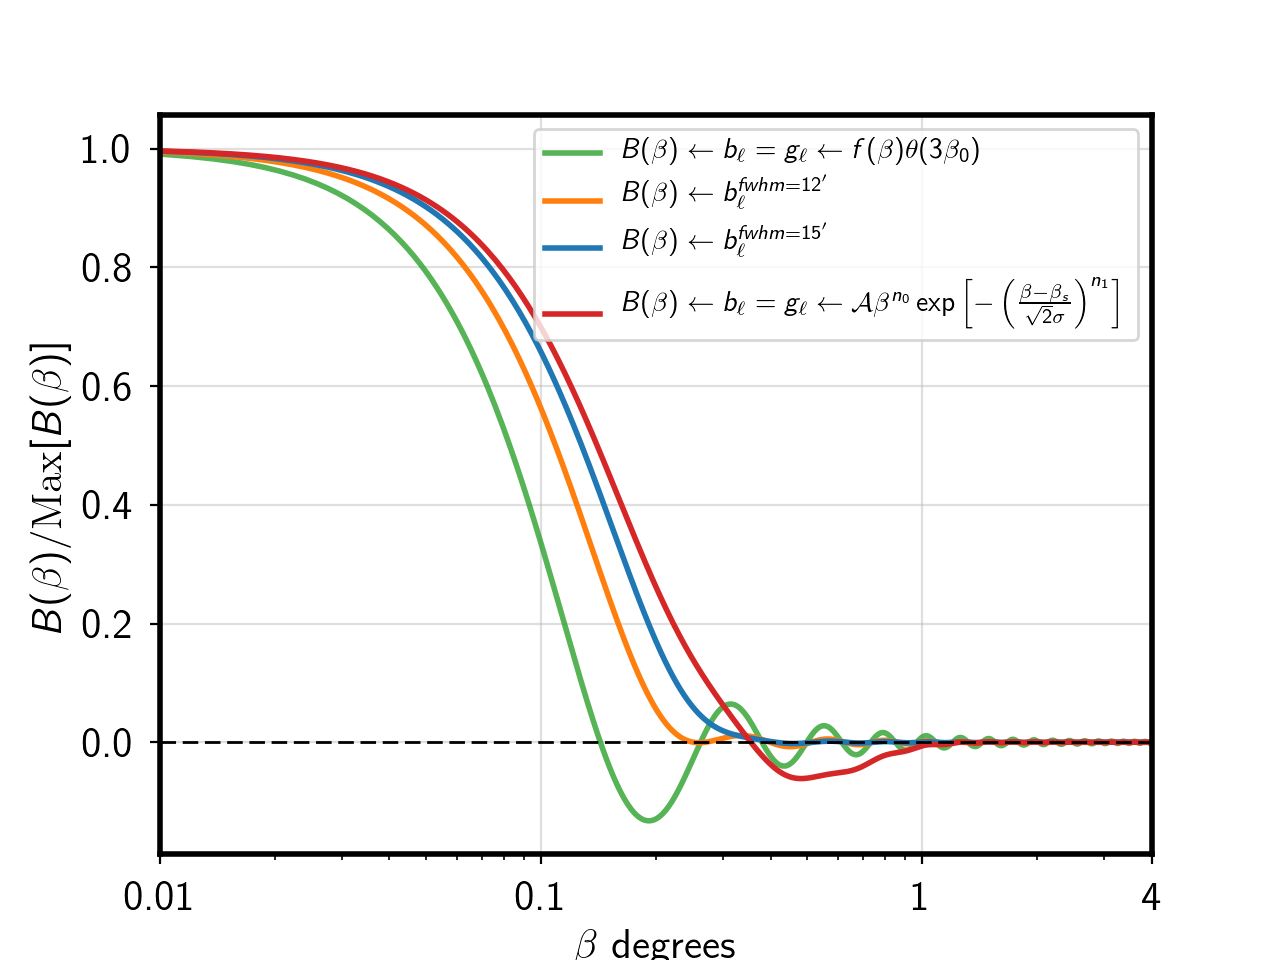

In [232]:
figure()
plot(theta*180./pi,beam_gl3/max(beam_gl3),"-",c=g,lw=2,alpha=0.8,label=r"$B(\beta) \leftarrow b_{\ell} = g_{\ell} \leftarrow f(\beta)\theta(3\beta_0)$")
plot(theta*180./pi,gbeamn/max(gbeamn),"-",c=o,lw=2,label=r"$B(\beta) \leftarrow b^{fwhm=12'}_{\ell}$")
plot(theta*180./pi,gbeamw/max(gbeamw),"-",c=b,lw=2,label=r"$B(\beta) \leftarrow b^{fwhm=15'}_{\ell}$")
plot(theta*180./pi,beam_glp/max(beam_glp),"-",c=r,lw=2,label=r"$B(\beta) \leftarrow b_{\ell} = g_{\ell} \leftarrow \mathcal{A} \beta^{n_0} \exp{\left[ -\left({\frac{\beta-\beta_s}{\sqrt{2} \sigma}}\right)^{n_1} \right] } $")
#plot(y1.theta*180./pi,bldelta/max(bldelta),"k--",lw=2,label=r"$B(\beta) \leftarrow g_{\ell}$")
xlim(1e-2,35*pixsize*180./pi)
axhline(0,0,35*pixsize*180./pi,lw=1,color="k",linestyle="dashed")
legend(loc=0,fontsize=10)
grid(alpha=0.4)
semilogx()
xticks([1e-2,1e-1,1e0,4],[0.01,0.1,1,4])
ylabel(r"$B(\beta)/\textrm{Max}[B(\beta)]$")
xlabel(r"$\beta$ degrees")
figname=figpath + "Bbeta_for_gl_lmax" + str(3*nside) + ".pdf"
savefig(figname,dpi=300,bbox_inches="tight")